# Выбор гипотез для увеличения выручки интернет-магазина

В качестве аналитика интернет-магазина совместно с отделом маркетинга нам предстоит отобрать гипотезы, направленные на увеличение выручки, для их последующего внедрения. 

Задача состоит из двух частей. 1 часть включает в себя приоритизацию гипотез с помощью методов ICE и RICE. У нас есть 9 гипотез для по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. После применения указанных методов необходимо выбрать, какие гипотезы более подходящи и почему.

Часть 2 заключается в проведении А/В-теста. У нас есть данные по заказам (с информацией о id заказа, дате, пользователе, совершившем заказ, стоимости и группе теста) и посетителями (информация о дате и количестве посетителей в эту дату и группе теста). В рамках теста нам необходимо выяснить статистическую значимость различий в среднем чеке заказа и в количестве заказов по группам, причем по "сырым" данным с выбросами и затем по "очищенным" данным. И необходимо сделать вывод о результатах теста.


## Содержание
* [Приоритизация гипотез](#приоритизация)
    * [Применение фреймворка ICE для приоритизации гипотез](#ICE)
    * [Применение фреймворка RICE для приоритизации гипотез](#RICE)
    * [Почему изменилась приоритизация гипотез после применения RICE](#причина_изменения_приоритизации)
* [Анализ А/В-теста](#анализ_теста)
    * [Кумулятивная выручка по группам](#выручка_группы)
    * [График кумулятивного среднего чека по группам](#график_чек)
    * [График относительного изменения кумулятивного среднего чека группы В к группе А](#изменение_чек_график)
    * [График кумулятивного среднего количества заказов на посетителя по группам](#график_заказы)
    * [График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А](#изменение_заказы_график)
    * [Точечный график количества заказов по пользователям](#точечный_график_заказы)
    * [Подсчет перцентилей количества заказов на пользователя](#перцентили_заказы)
    * [Точечный график стоимости заказов](#точечный_график_заказы)
    * [Подсчет перцентилей стоимости заказов](#перцентили_стоимость)
    * [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным](#статзнач_заказы_сырые)
    * [Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным](#статзнач_чек_сырые)
    * [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным](#статзнач_заказы_очищенные)
    * [Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным](#статзнач_чек_очищенные)
    * [Решение по результатам А/В-теста](#решение)

### Приоритизация гипотез <a class="anchor" id="приоритизация"></a>

Для начала необходимо приоритизировать 9 гипотез по увеличению выручки магазина. 

In [10]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy import stats as st

In [2]:
# загружаем данные
hypotheses = pd.read_csv('C:\\Users\\kwint\\Desktop\\Data_Analysis\\Yandex.Practicum\\files\\hypothesis.csv')

In [3]:
# проверяем данные
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypotheses.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
# с данными все в порядке
# приведем все к нижнему регистру для удобства
hypotheses.columns = hypotheses.columns.str.lower()

#### Применение фреймворка ICE для приоритизации гипотез <a class="anchor" id="ICE"></a>

In [6]:
# чтобы все строки были видны
pd.set_option('display.max_colwidth', None)

In [7]:
# Применим ICE и отсортируем по убыванию приоритета
hypotheses['ICE'] = round((hypotheses['impact'] * hypotheses['confidence']) / hypotheses['efforts'],2)
hypotheses.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


В соответствии с методом ICE топ-5 cамых перспективных гипотез входят гипотезы:
- 8: Запустить акцию, дающую скидку на товар в день рождения
- 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Остальные гипотезы получили гораздо меньше баллов, чем вышеуказанные. 

Попробуем еще один метод приоритизации для сравнения.

#### Применение фремворка RICE для приоритизации гипотез <a class="anchor" id="RICE"></a>

In [8]:
# применим метод и округлим значения, а затем приоритизируем гипотезы
hypotheses['RICE'] = round((hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['efforts'], 2)
hypotheses.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении данного метода сложилась другая ситуация. Все еще 5 гипотез набирают гораздо больше баллов. Вот этот топ-5 самых приоритетных гипотез:
- 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 8: Запустить акцию, дающую скидку на товар в день рождения	

Гипотезы те же, что и в приоритетных после использования метода ICE, но их порядок другой. 

#### Почему изменилась приоритизация гипотез после применения RICE? <a class="anchor" id="причина_изменения_приоритизации"></a>

In [9]:
# выведем таблицу, чтобы увидеть все показатели
hypotheses

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


При использовании метода RICE добавляется новый параметр - reach, т.е. охват. Из-за него поменялся порядок приоритетов. Именно поэтому первое место стала занимать гипотеза под номером **7** (добавить форму подписки на все основные страницы), так как она охватывает практически всех пользователей сайта, а гипотеза под номером **8** (Запустить акцию, дающую скидку на товар в день рождения) стала занимать последнее место в топ-5, хотя была на первом в списке ICE. У нее охват - 1 - только те пользователи, у которых день рождения. 

Выбор нужной гипотезы зависит от тех показателей, которых отдел маркетинга, например, больше всего учитывает: reach или impact, или же confidence. Например, у гипотезы под № **0** (добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) охват всего лишь 3, но влияние - 10. 

Имеет смысл попытаться внедрить гипотезы 7 или 0, так как они входят в топ-3 после использования каждого из методов, но, опять же, зависит от приоритетных показателей.

### Анализ A/B-теста <a class="anchor" id="анализ_теста"></a>

In [11]:
# загружаем данные и сразу же приводим дату к нужному формату
orders = pd.read_csv('C:\\Users\\kwint\\Desktop\\Data_Analysis\\Yandex.Practicum\\files\\orders.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('C:\\Users\\kwint\\Desktop\\Data_Analysis\\Yandex.Practicum\\files\\visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# просмотрим данные
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# проверим данные на наличие пропусков
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
# проверяем на дубликаты
visitors.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
# изменим название столбцов в таблице orders для удобства
orders = orders.rename(columns = {'transactionId': 'transaction_id',
                                 'visitorId': 'visitor_id'})

In [18]:
# проверяем наличие одинаковых пользователей в обеих группах
orders[orders.duplicated(['visitor_id'], keep=False)].sort_values(by='visitor_id')

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
1102,1941707234,199603092,2019-08-12,6438,A
823,2971973105,199603092,2019-08-27,2790,A
134,62794304,199603092,2019-08-22,6976,A
...,...,...,...,...,...
1019,453824282,4256040402,2019-08-31,1850,B
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
682,1216533772,4266935830,2019-08-29,78990,B


In [19]:
# одинаковые пользователи есть, создадим для них отдельную таблицу
duplicated_ids = orders.groupby(['visitor_id']).agg({'group': ['nunique', 'unique'], 'revenue' : 'sum'}).reset_index()
duplicated_ids.columns = ['visitor_id','counts', 'group', 'revenue']
# число заказов должно быть больше 2, чтобы пользователь появился в обеих группах
duplicated_ids = duplicated_ids.query('counts > 1')
duplicated_ids

,visitor_id,counts,group,revenue
2,8300375,2,"[B, A]",12300
44,199603092,2,"[A, B]",23180
51,232979603,2,"[B, A]",2700
55,237748145,2,"[B, A]",10810
66,276558944,2,"[B, A]",17400
84,351125977,2,"[B, A]",19670
97,393266494,2,"[A, B]",55290
114,457167155,2,"[B, A]",9857
119,471551937,2,"[A, B]",26410
122,477780734,2,"[A, B]",10950


In [20]:
# чтобы отсортировать данные, создадим переменную с этими дублирующимися пользователями
filter_id = duplicated_ids[duplicated_ids.counts > 1]['visitor_id'].unique()

In [21]:
# перезаписываем таблицу
orders = orders.query('visitor_id not in @filter_id').reset_index()

In [22]:
orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,1650,B
1,1,2804400009,3642806036,2019-08-15,730,B
2,3,3797467345,1196621759,2019-08-15,9759,B
3,4,2282983706,2322279887,2019-08-15,2308,B
4,5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,16490,B
1012,1192,2662137336,3733762160,2019-08-14,6490,B
1013,1193,2203539145,370388673,2019-08-14,3190,A
1014,1194,1807773912,573423106,2019-08-14,10550,A


В данных нет ни пропусков, ни дубликатов. Однако обнаружились пользователи, которые есть в обеих группах. Их нам пришлось удалить для дальнейшей работы. Для удобства изменили тип данных и названия столбцов.

#### Кумулятивная выручка по группам <a class="anchor" id="выручка_группы"></a>

Для расчета кумулятивной выручки нам необходимо собрать кумулятивные данные о заказах и о покупателях. 

In [23]:
# сначала создадим массив уникальных пар дат и групп
dates_groups = orders[['date','group']].drop_duplicates()

In [24]:
# собираем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [25]:
# собираем агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [26]:
# соединяем данные в одну таблицу и присваиваем столбцам понятные названия
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulative_data.columns = [
    'date', # дата
    'group', # группа А/В-теста
    'orders', # кумулятивное число заказов на определенную дату
    'buyers', # кумулятивное число покупателей, т.е. они совершили хотя бы один заказ, на определенную дату
    'revenue', # кумулятивная выручка на определенную дату
    'visitors', # кумулятивное число посетителей
]

In [27]:
# посмотрим, все ли в таблице нормально 
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [28]:
# теперь строим графики для каждой группы по дням
# сначала выделим группу А с данными о заказах, датах и выручке
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]

In [29]:
# то же самое для групып В
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

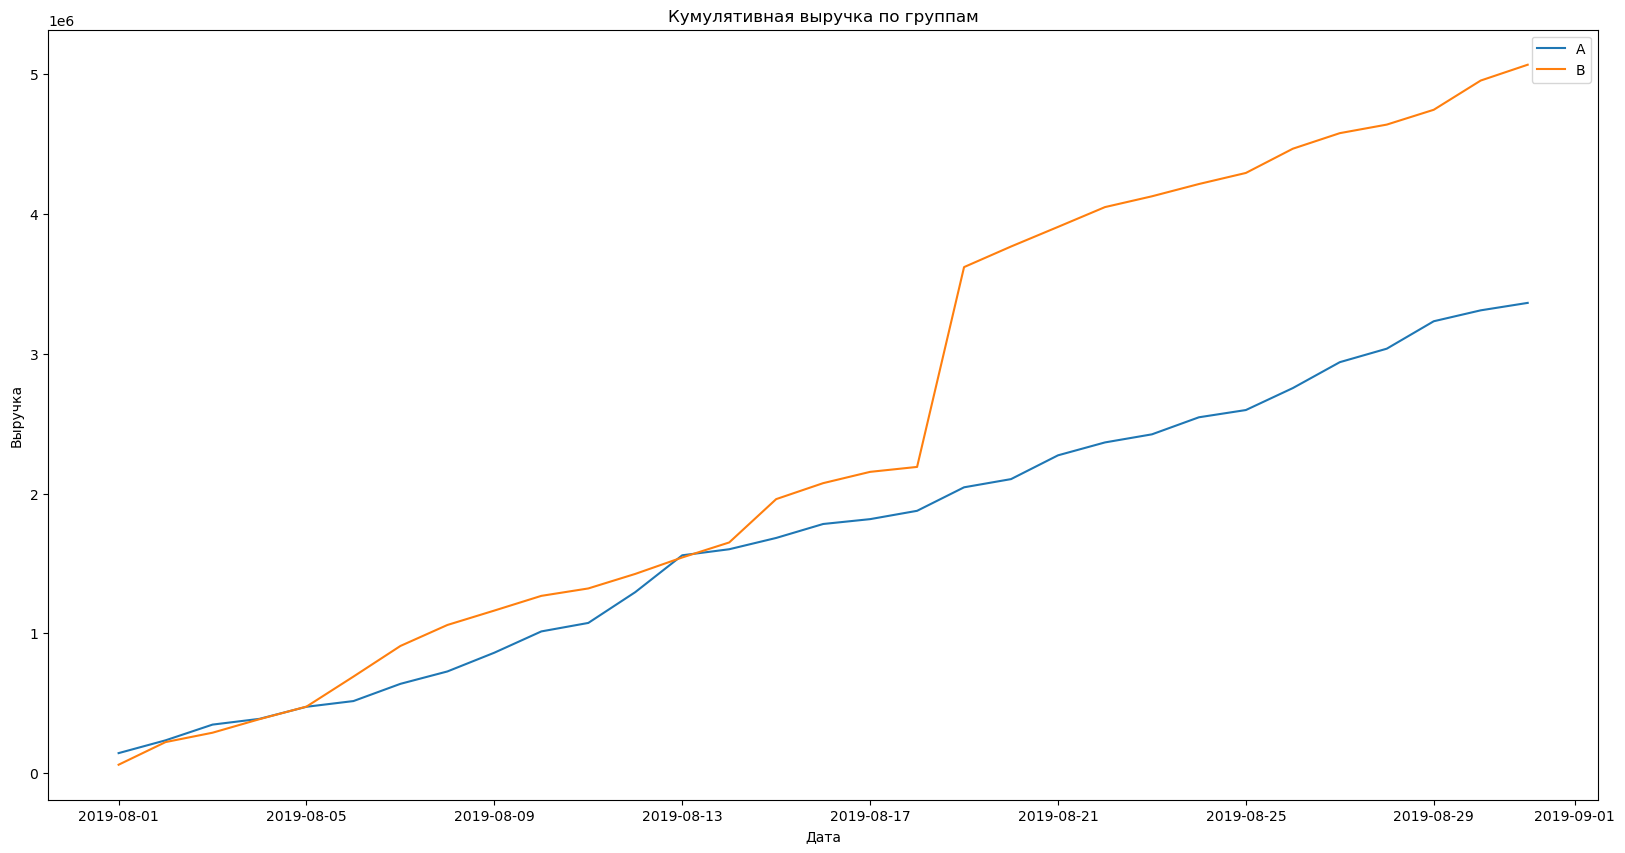

In [30]:
# строим графики 
plt.figure(figsize=(20, 10))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Судя по графику выручка в обеих группах почти равномерно растет, что является хорошим знаком, однако в группе В заметно резкое увеличение между 17 и 21 августа, что может свидетельствовать о аномальных всплесках. 
Кроме того, выручка в группе В на протяжении всего периода выше, чем в группе А, несмотря на то, что до всплеска они были практически на одном уровне. 

#### График кумулятивного среднего чека по группам <a class="anchor" id="график_чек"></a>

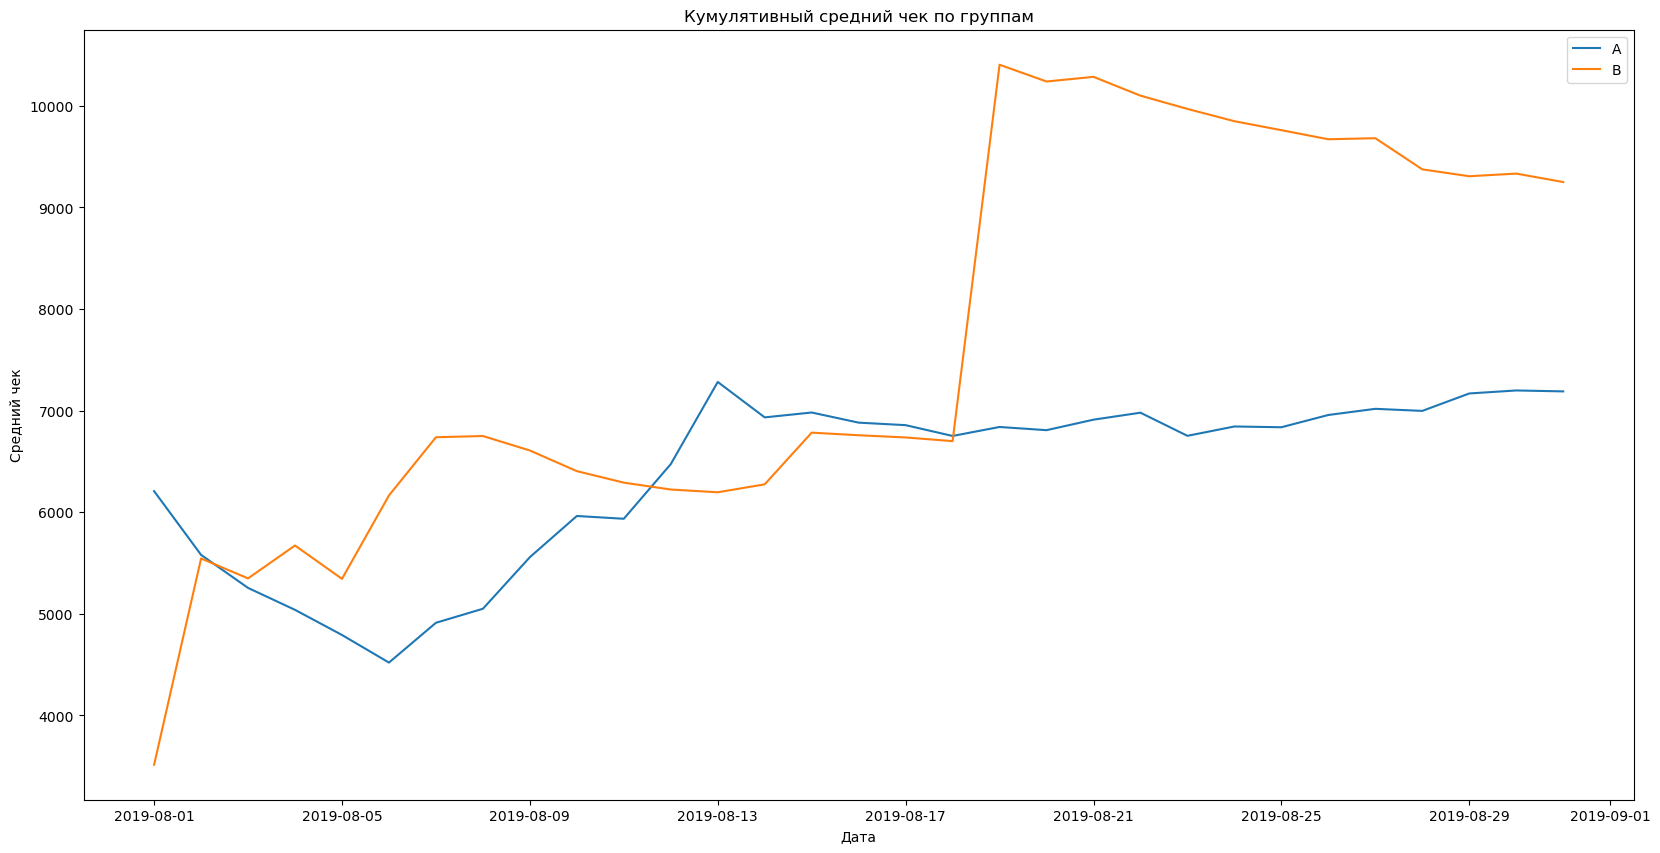

In [31]:
# для подсчета среднего чека разделим выручку на количество заказов
plt.figure(figsize=(20, 10))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Средний чек вроде бы становится равномерным к концу исследуемого периода, однако его колебания в начале в обеих группах могут говорить о том, что принимать решения касаемо этой метрики все еще рано. 
Здесь также виден резкий всплеск в группе В. 
В обеих группах к концу периода видим небольшое понижение несмотря на общее повышение среднего чека. 

 #### График относительного изменения кумулятивного среднего чека группы B к группе A <a class="anchor" id="изменение_чек_график"></a>

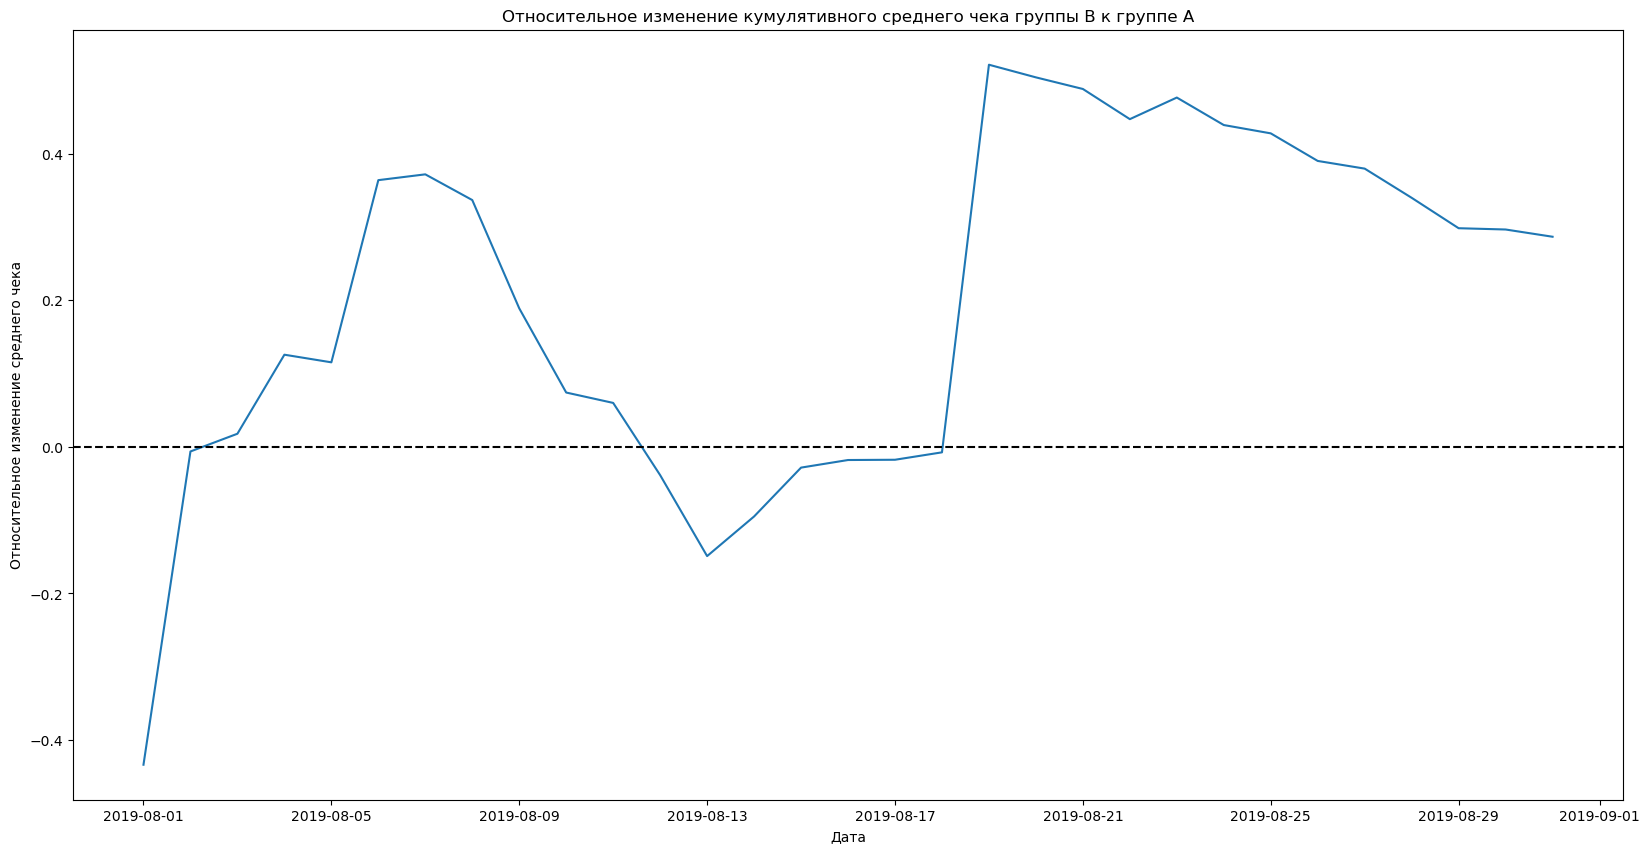

In [32]:
# сначала собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(
    cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
# строим график
plt.figure(figsize=(20, 10))
plt.plot(
    merged_cumulative_revenue['date'], 
    (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA']) - 1
)
plt.axhline (y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.show()

На графике видны резкие скачки в отношении группы В к А. Скорее всего, именно тогда делались аномально большие заказы. И в целом отношение неравномерно на протяжении всего периода. 

#### График кумулятивного среднего количества заказов на посетителя по группам <a class="anchor" id="график_заказы"></a>

In [33]:
cumulative_orders_A = cumulative_data[cumulative_data['group']=='A'][['date', 'visitors', 'orders']]
cumulative_orders_B = cumulative_data[cumulative_data['group']=='B'][['date', 'visitors', 'orders']]

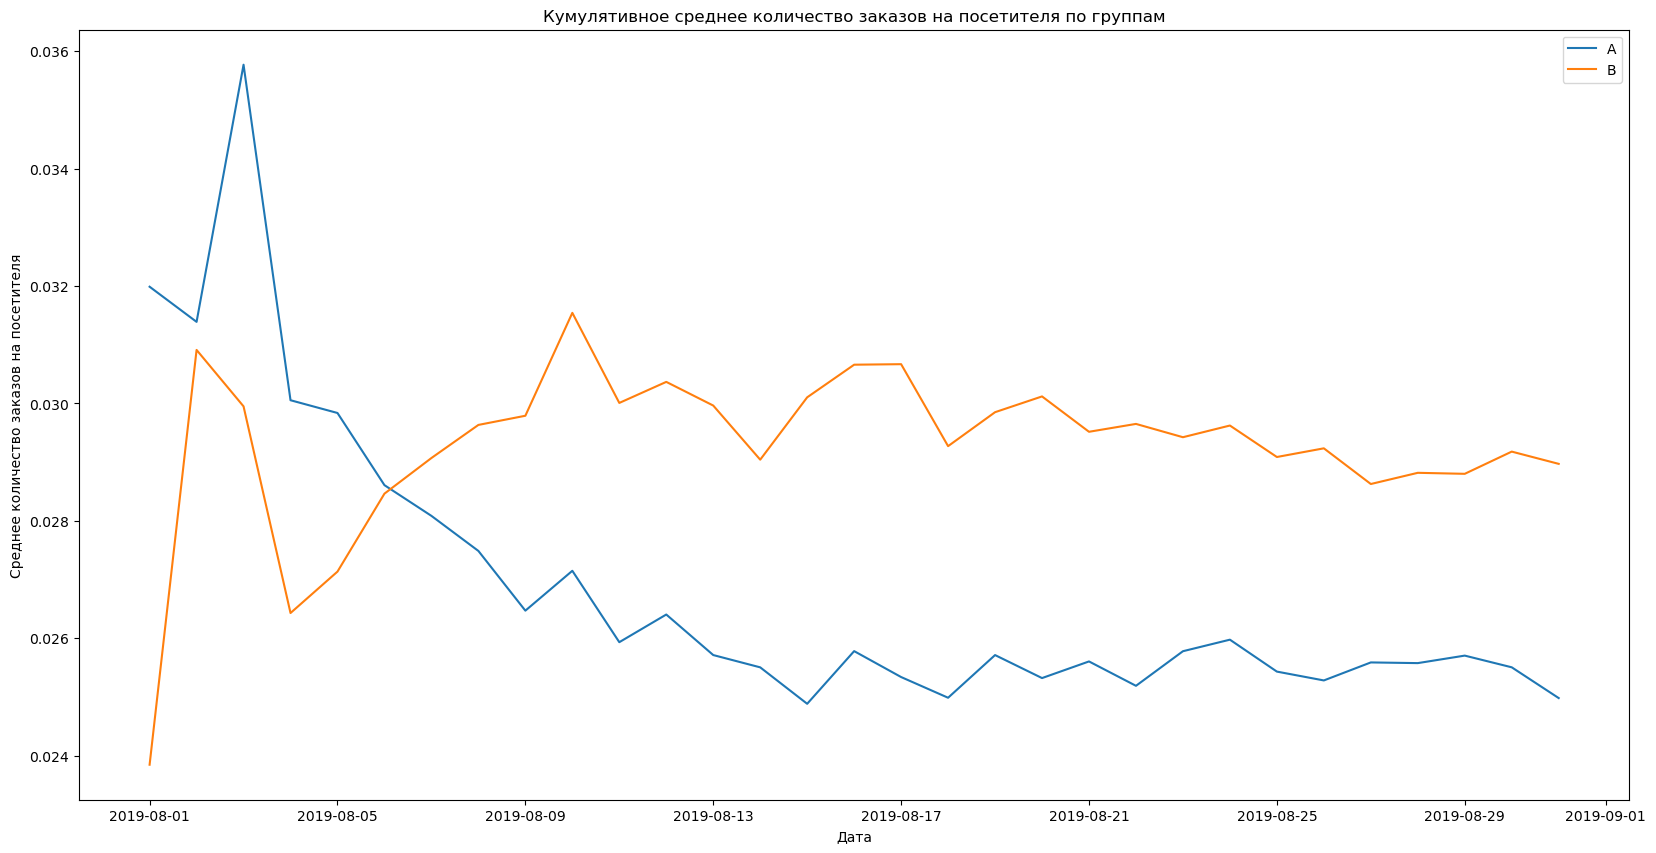

In [34]:
# для построения графика разделим количество заказов на количество посетителей
plt.figure(figsize=(20, 10))
plt.plot(cumulative_orders_A['date'], cumulative_orders_A['orders']/cumulative_orders_A['visitors'], label='A')
plt.plot(cumulative_orders_B['date'], cumulative_orders_B['orders']/cumulative_orders_B['visitors'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.show()

Если в начале графика среднее количество заказов для обеиз групп сильно варьировалось, то к концу мы видим некоторую стабилизацию. Кроме того, количество заказов в группе А незначительно меньше, чем количество заказов в группе В, хотя в начале наблюдаемого периода был значительный всплеск в группе А, как и в группе В. 
Также по этим всплескам можно предположить о наличии аномалий, отсносящихся к количеству заказов, в обеих группах

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A <a class="anchor" id="изменение_заказы_график"></a>

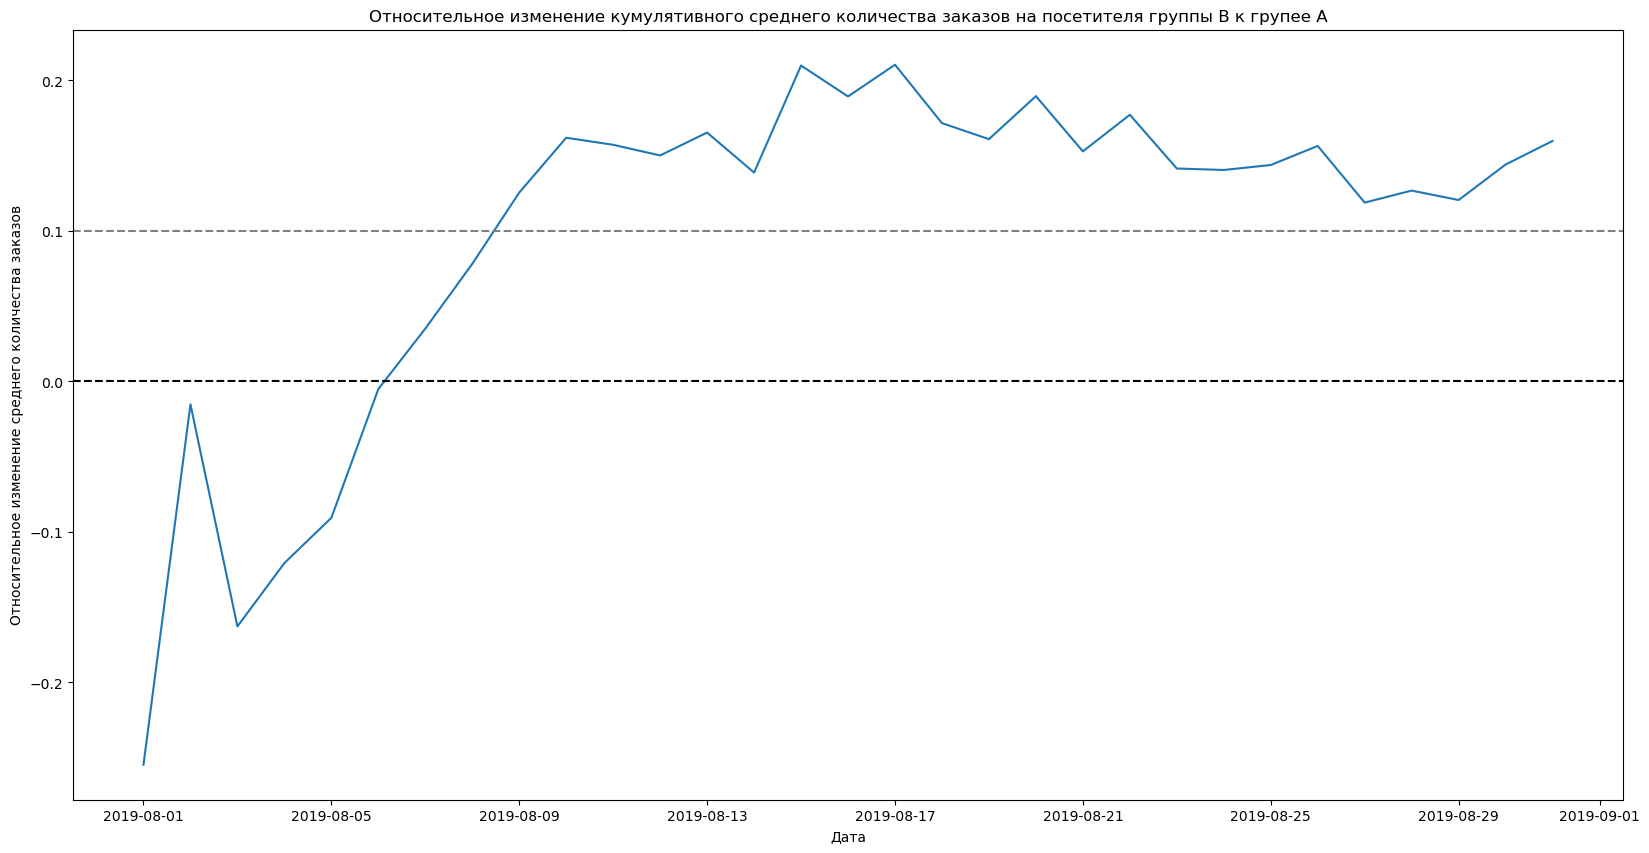

In [35]:
# сначала собираем данные в одном датафрейме
merged_cumulative_orders = cumulative_orders_A.merge(
    cumulative_orders_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
# строим график
plt.figure(figsize=(20, 10))
plt.plot(
    merged_cumulative_orders['date'], 
    (merged_cumulative_orders['ordersB'] / merged_cumulative_orders['visitorsB']) / (merged_cumulative_orders['ordersA'] / merged_cumulative_orders['visitorsA']) - 1
)
plt.axhline (y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к групее А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего количества заказов')
plt.show()

В самом начале графика заметны несколько резких скачков и одно большое падение в отношении количепства заказов группы В к группе А, затем отношение выравнивается и в конце немного повышается. Необходимо искать аномалии. 

#### Точечный график количества заказов по пользователям <a class="anchor" id="точечный_график_заказы"></a>

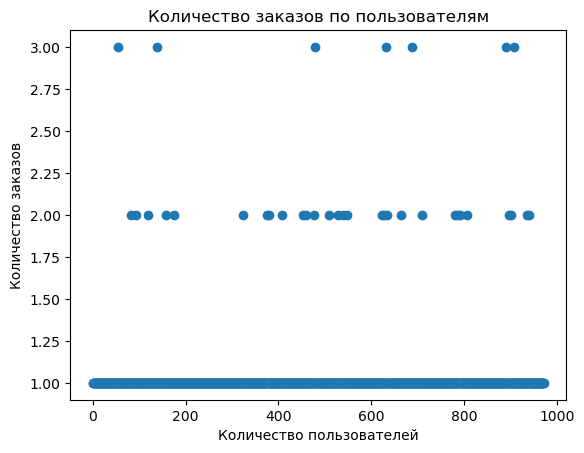

In [36]:
# для начала сгруппируем данные по пользователям и заказам
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'orders']
# построим график
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Много пользователей с 1 заказами, однако достаточно большое количество и с 2 заказами. Небольшое количество с тремя. В последующем надо выяснить, считать ли их аномалиями или нет. Надо посчитать перцентили. 

#### Подсчет перцентилей количества заказов на пользователя <a class="anchor" id="перцентили_заказы"></a>

In [37]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли более 1 заказов и не более 1% оформляли более 2 заказов. Поставим границу в 2 заказа на пользователя. Это соответсвует графику и попадает в указанный в перцентилях промежуток. 

#### Точечный график стоимости заказов <a class="anchor" id="точечный_график_заказы"></a>

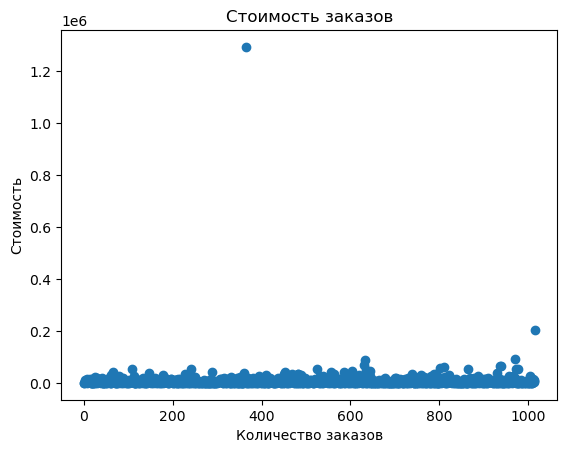

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость')
plt.show()

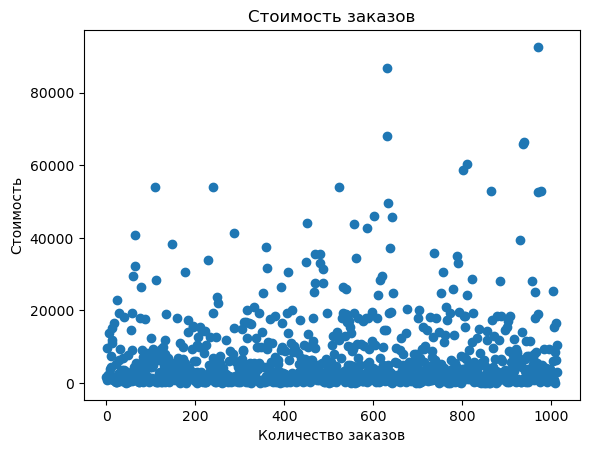

In [39]:
# удалим аномальный заказ и еще раз построим график
norm_values = orders.query('revenue <= 200000')

x_values = pd.Series(range(0, len(norm_values['revenue'])))
plt.scatter(x_values, norm_values['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость')
plt.show()

На первом графике видны два аномальных значения, а все остальные попали в промежуток от 0 до примерно 100000. При этом график не очень информативен как раз из-за аномалий. Для лучшего просмотра мы построили второй график, где более наглядно продемонстрировано, что большая часть заказов стоит даже менее 30000. ЧТобы убедиться в этом, посчитаем перцентили. 

#### Подсчет перцентилей стоимости заказов <a class="anchor" id="перцентили_стоимость"></a>

In [40]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26785, и не более 1% заказов дороже 53904. Поставим пороговое значение в 30 тысяч, тем самым уберем примерно 5% пользователей, совершивших более дорогие заказы.

#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным <a class="anchor" id="статзнач_заказы_сырые"></a>

Перед расчетами сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза: Между группами А и В нет различий в среднем количестве заказов на посетителя.
- Альтернативная гипотеза: Между группами А и В различия в среднем количестве заказов на посетителя есть.

In [41]:
# сначала создадим таблицу с кумулятивным количеством посетителей по дням в каждой группе
# группа А
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

In [42]:
# то же самое для группы В
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

In [43]:
# теперь посчитаем суммарное количество заказов на определенную дату для каждой группы
# количество заказов в выбранную дату в группе А
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A'] 

# суммарное количество заказов в группе А на определенную дату
orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

In [44]:
# # количество заказов в выбранную дату в группе В
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

# суммарное количество заказов в группе В на определенную дату
orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

In [45]:
# объединим все в общую таблицу data
data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

In [46]:
data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [47]:
# создадим новые переменные для каждой группы, где для каждого покупателя укажем количество заказов
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitor_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitor_id', 'orders']

In [48]:
# снова создадим новые переменные, 
# где каждый элемент - число заказов определенного пользователя по группам
sampleA = pd.concat(
    [orders_by_users_A['orders'],
    pd.Series(
        0,
        index=np.arange(
            data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
        ),
        name='orders',
    )],
    axis = 0,
)
sampleB = pd.concat(
    [orders_by_users_B['orders'],
    pd.Series(
        0,
        index=np.arange(
            data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
        ),
        name='orders',
    )],
    axis = 0,
)

In [49]:
# применим критерий Манна-Уитни для подсчета статистической значимости и отобразим p-value
# также найдем относительное различие в среднем между группами
print('p_value: '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего группы В: '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p_value: 0.011
Относительный прирост среднего группы В: 0.160


Судя по "сырым" данным, 0.011 меньше 0.05, так что мы можем отвергнуть нулевую гипотезу о том, что различий в среднем числе заказов групп A и B нет, и принять альтернативную, что различия есть. 

Относительный прирост среднего группы В по отношению к группе А - 16%, что достаточно значительный процент. Надо убрать аномалии и посмотреть на данные показатели еще раз. 

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a class="anchor" id="статзнач_чек_сырые"></a>

Сформулируем нулевую и альтернративную гипотезы. 
- Нулевая гипотеза: Нет различий в среднем чеке заказа между группами А и В.
- Альтернативная гипотеза: Различия в среднем чеке заказа между группами А и В есть. 

In [50]:
# для применения критерия Манна-Уитни используем данные о выручке заказов и выведем p-value
# также подсчитаем относительные различия в среднем чеке между группами
print("p-value: "'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный прирост среднего чека: "'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительный прирост среднего чека: 0.287


P-value 0.829 значительно больше 0.05, так что оснований для того, чтобы отвергнуть нулевую гипотезу об отсутсвии различий в среднем чеке, нет.

Кроме того, средний чек группы В значительно (практически 29%) выше среднего чека группы А, но так как мы отвергли нулевую гипотезу, для нас эти данные не очень важны.

#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным <a class="anchor" id="статзнач_заказы_очищенные"></a>

Так как мы приняли за аномальных пользователей тех, кто совершил более 2 заказов на сумму более 30 000, то сделаем срезы как раз по этим значениям и выберем этих пользователей. 

Сформулируем нулевую и альтернативную гипотезы.
- Нулевая гипотеза: Между группами нет различий в среднем количестве заказов на посетителя.
- Альтернативная гипотеза: Различия в среднем количестве заказов на посетителя между группами есть.

In [51]:
# пользователи с количеством заказов больше 2
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 2]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

In [52]:
# пользователи с дорогими заказами
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

In [53]:
# объединяем данные и получаем аномальных пользователей
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [54]:
# посчитаем их количество
# итого около 4.7 процентов пользователей - аномальные
abnormal_users.shape[0]

49

In [55]:
# снова собираем данные по пользователям и количеству заказов
sampleA_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [56]:
# применяем статистический критерий Манна-Уитни 
# и подсчитываем относительное различие в среднем между группами
print("p-value: "'{0:.3f}'.format(stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print("Относительный прирост в среднем чеке между группами: "'{0:.3f}'.format(sampleB_filtered.mean()/sampleA_filtered.mean()-1)) 

p-value: 0.010
Относительный прирост в среднем чеке между группами: 0.187


0.01 все так же меньше 0.05, так что и по "очищенным" данным мы имеем основание отвергнуть нулевую гипотезу и принять альтернативную о том, что статистически значимая разница в среднем количестве заказов между посетителями есть. 

Разница в среднем между группами А и В выше, чем в "сырых" данных. Группа В лучше на 18.7%.

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным <a class="anchor" id="статзнач_чек_очищенные"></a>

 Сформулируем нулевую и альтернативную гипотезы. 
- Нулевая гипотеза: Нет различий в среднем чеке заказа между группами А и В.
- Альтернативная гипотеза: Различия в среднем чеке заказа между группами А и В есть. 

In [57]:
# теперь посмотрим на различия в среднем чеке
print('p-value:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Отношение среднего чека группы B к группе А:'
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:0.741
Отношение среднего чека группы B к группе А:-0.027


Так же, как и в сырых данных, p-value значительно выше 0.05, так что нулевую гипотезу об отсутствии различий в среднем чеке между группами мы отвергнуть не можем. 

Однако после удаления выбросов сегмент В оказался по среднему чеку меньше, чем сегмент А на 2%, а до этого был выше на 28%. В этом отношении выбросы существенно исказили картину. Но из-за того, что мы не можем отвергнуть нулевую гипотезу, данные различия не являются статистически значимыми.

#### Решение по результатам А/В - теста <a class="anchor" id="решение"></a>

**Выводы, к которым мы пришли после проведения А/В-тестирования**

- Статистически занчимое различие по среднему количеству заказов есть. Это видно как и по "сырым" данным, так и по "очищенным".
- Среднее количество заказов в группе В больше, чем среднее количество заказов в группе "А" в обоих типах данных. В случае с "сырыми" данными этот разрыв - 16%, в случае с "очищенными" - 18.7%.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
- Есть относительные различия в среднем чеке между группами А и В. Если в "сырых" данных группа В значительно обгоняла группу А - на 28.7%, то после удаления аномалий, ее показатели стали гораздо хуже - на 2% хуже, чем в группе А. Для нас эти значения не очень применимы, так как различия не являются статистически значимыми.
- График различия среднего количества заказов между группами сообщает, что результаты группы В значительно лучше результатов группы А, однако график продолжает флуктуировать в положительной плоскости. 
- График различия среднего чека говорит о том, что группа В продолжает значительно изменяться: то значения выше группы А, то ниже. На конец исследуемого периода значение продолжает падать. Для нас этот график не очень информативен.

Опираясь на вышеизложенные положения, следует заключить, что тест можно остановить и зафиксировать победу группы В, так как среднее количество заказов в группе В значительно выше, чем в группе А. И разница между группами является статистически значимой. 